In [ ]:
from scipy.interpolate import CubicSpline as spline
from scipy.interpolate import CubicHermiteSpline as hermite
from scipy.interpolate import interp1d as inter
import numpy as np
from numpy.polynomial.polynomial import Polynomial as po
from matplotlib import pyplot as plt
%matplotlib inline

# Problem 7

## a)

In [ ]:
# from the last homework:

def func(x):
  return 1/(1+x**2)

x = np.arange(-5,5.1,10/13)
y = func(x)

Text(0.5, 1.0, '1d polynomial interpolation')

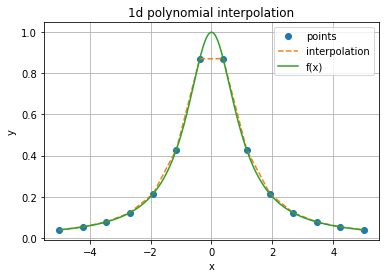

In [ ]:
plt.plot(x,y, 'o', label = 'points')
newx = np.arange(-5, 5, 0.01)

#using 1d piecewise interpolation:
plt.plot(newx,inter(x,y)(newx),'--', label = 'interpolation')
plt.plot(newx, func(newx), label = 'f(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('1d polynomial interpolation')

## b) The problem requires to write your own routine 

In [ ]:
def fder(x):
  # define derivate of Rungee function
  return -2*x/(1+x**2)**2

def a(x0,x1):
  # alpha coefficient according to (8.18)

  h = x1-x0
  return 3/h**2 * (fder(x0) + fder(x1)) + 6/h**3 * (func(x0) - func(x1))

def p(x0, x1):
  """
  This function returns numpy polynomial object that is a 3rd degree hermite
  interpolant according to (8.17)
  """

  h = x1-x0
  x = po((0,1))

  A = -fder(x0)/h * ((x-x1)**2/2-h**2/2)
  B = fder(x1)/h * (x-x0)**2/2
  C = a(x0, x1) * (x-x0)**2 * ((x-x0)/3 - h/2)
  D = func(x0)

  return A + B + C + D

# example

p(1,2)


Polynomial([ 1.32, -1.2 ,  0.44, -0.06], domain=[-1.,  1.], window=[-1.,  1.])

Text(0.5, 1.0, 'Cubic Hermite interpolation')

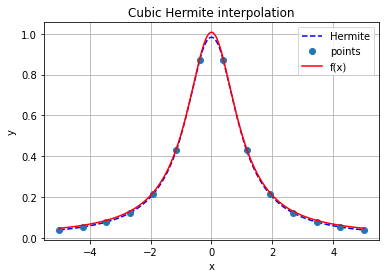

In [ ]:
# creating intervals of x values between the equidistant points
intervals = [np.arange(x[i],x[i+1], 0.01) for i in range(len(x)-1)]

# plotting every cubic polynomial on its interval separately 
for i in range(len(x)-1):
  if i == len(x)-2:
    # this is to create one legend label instead of n of them
    plt.plot(intervals[i], p(x[i], x[i+1])(intervals[i]), '--', color = 'blue', label = 'Hermite')
  else:
    plt.plot(intervals[i], p(x[i], x[i+1])(intervals[i]), '--', color = 'blue')

# plotting the function and the points
# the function is plotted 0.008 higher to visually show the Hermite line
plt.plot(x,y, 'o', label = 'points')
plt.plot(newx, func(newx)+0.008, label = 'f(x)', color = 'red')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Hermite interpolation')

## c)

Text(0.5, 1.0, 'Cubic spline interpolation')

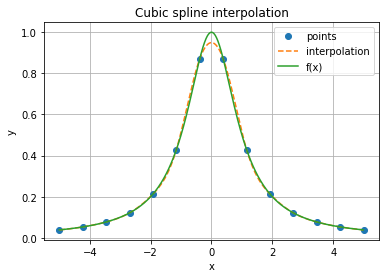

In [ ]:
plt.plot(x,y, 'o', label = 'points')
newx = np.arange(-5, 5, 0.01)

#implementing cubic spline
plt.plot(newx,spline(x,y)(newx),'--', label = 'interpolation')
plt.plot(newx, func(newx), label = 'f(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic spline interpolation')

#Problem 8

## a)

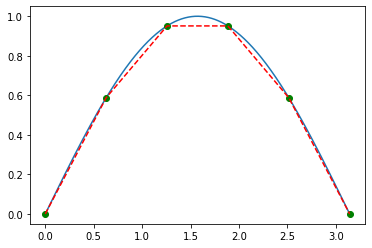

In [ ]:
x = np.arange(0, np.pi * (1+1/1000), np.pi/1000)
y = np.sin(x)
plt.plot(x,y)

#to demosntrate interpolation we take 5 points
newx = x[::200]
newy = np.sin(newx)
p = inter(newx, newy)(newx)

plt.plot(newx,newy, 'o', color = 'green')
plt.plot(newx,p, '--', color = 'red')

## b)

In [ ]:
r = np.pi * np.random.rand(100)

In [ ]:
# differences
abs_error = abs(inter(x,y)(r) - np.sin(r))
rel_error = abs_error/np.sin(r)

print('max abs error:', max(abs_error), '; max rel error:', max(rel_error))

max abs error: 1.222705953374259e-06 ; max rel error: 1.2336918834891237e-06


# Problem 9

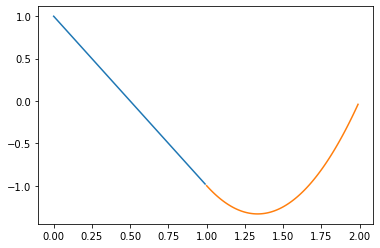

In [ ]:
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(1, 2, 0.01)

plt.plot(x1, po((1,-2))(x1))
plt.plot(x2, po((4, -8, 3))(x2))

# Problem 10

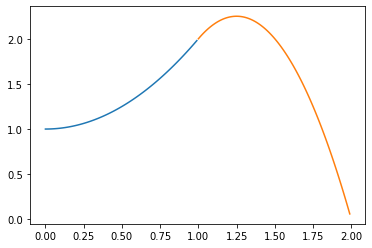

In [ ]:
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(1, 2, 0.01)

plt.plot(x1, po((1,0,1))(x1))
plt.plot(x2, po((-4,10,-4))(x2))